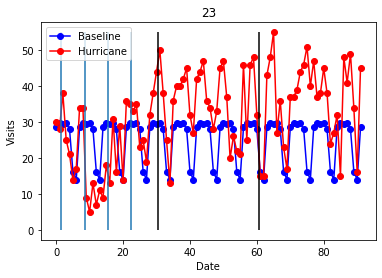

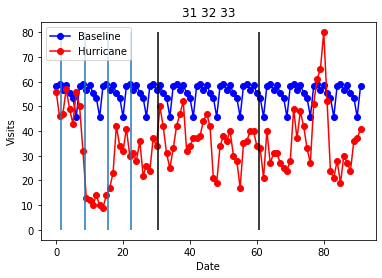

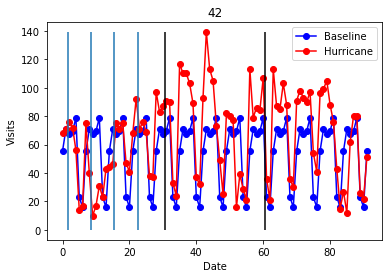

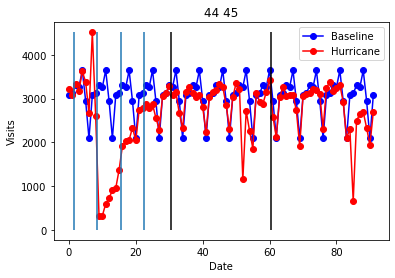

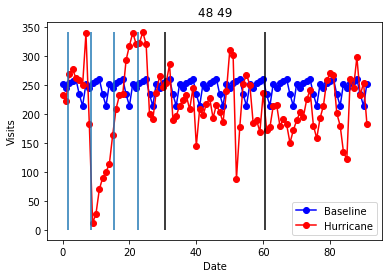

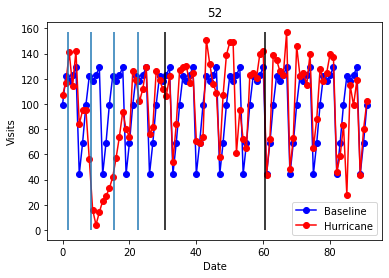

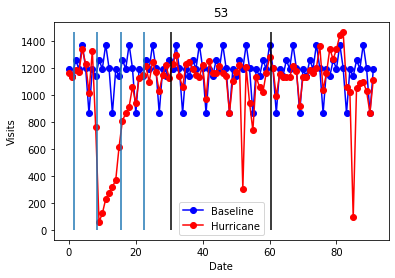

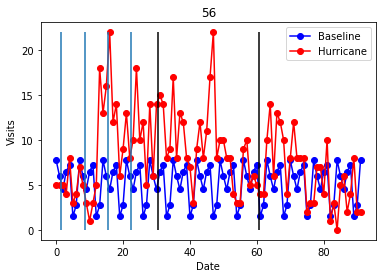

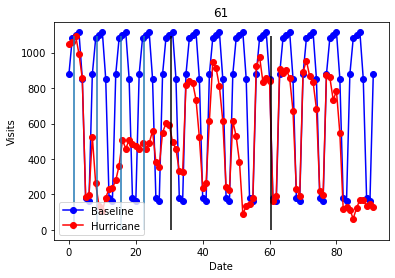

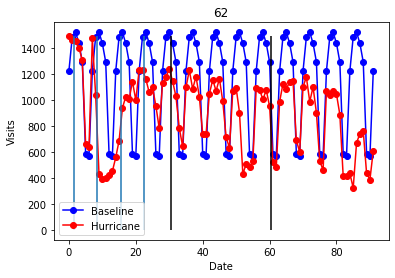

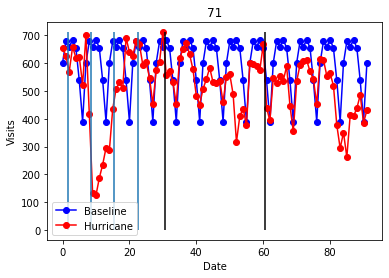

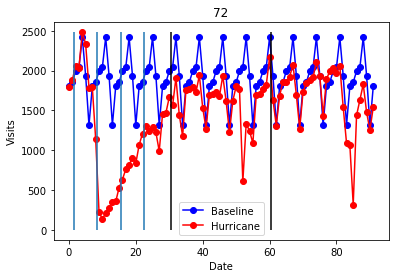

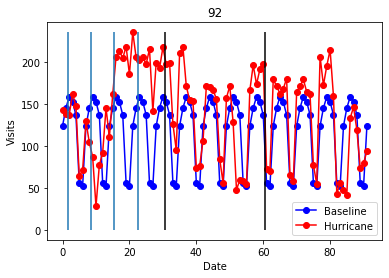

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Cities: Panama_city, Panama_city_beach, Tallahassee, Pensacola
city = 'Panama_city'

data_2018_09 = pd.read_excel(city + '_2018_09.xlsx','Sheet1')
data_2018_10 = pd.read_excel(city + '_2018_10.xlsx','Sheet1')
data_2018_11 = pd.read_excel(city + '_2018_11.xlsx','Sheet1')
data_2018_12 = pd.read_excel(city + '_2018_12.xlsx','Sheet1')
data_2018_09 = data_2018_09[['category','visits_by_day']]
data_2018_10 = data_2018_10[['category','visits_by_day']]
data_2018_11 = data_2018_11[['category','visits_by_day']]
data_2018_12 = data_2018_12[['category','visits_by_day']]

#Change category
category = [[23],[31,32,33],[42],[44,45],[48,49],[52],[53],[56],[61],[62],[71],[72],[92]]

for k in range(len(category)):
    #Visits for baseline
    df_09 = data_2018_09[data_2018_09['category'].isin(category[k])].reset_index()
    
    visits_09, visits_ba = [0] * 30, [0] * 28
    for i in range(len(df_09)):
        visits_09 = np.sum([visits_09, eval(df_09['visits_by_day'][i])], axis=0)
    for i in range(7):
        for j in range(4):
            visits_ba[i+7*j] = np.mean([visits_09[2+i], visits_09[9+i], visits_09[16+i], visits_09[23+i]])
    
    visits_ba = visits_ba * 3 + visits_ba[0:8]
    
    #Visits for hurricane
    df_10 = data_2018_10[data_2018_10['category'].isin(category[k])].reset_index()
    df_11 = data_2018_11[data_2018_11['category'].isin(category[k])].reset_index()
    df_12 = data_2018_12[data_2018_12['category'].isin(category[k])].reset_index()
    
    visits_10, visits_11, visits_12 = [0] * 31, [0] * 30, [0] * 31
    for i in range(len(df_10)):
        visits_10 = np.sum([visits_10, eval(df_10['visits_by_day'][i])], axis=0)
    for i in range(len(df_11)):
        visits_11 = np.sum([visits_11, eval(df_11['visits_by_day'][i])], axis=0)
    for i in range(len(df_12)):
        visits_12 = np.sum([visits_12, eval(df_12['visits_by_day'][i])], axis=0)
    
    visits = list(visits_10) + list(visits_11) + list(visits_12)
    
    #Visualization
    plt.plot(range(92), visits_ba, 'o-', label = 'Baseline', color = 'b')
    plt.plot(range(92), visits, 'o-', label = 'Hurricane', color = 'r')
    
    plt.vlines(1.5, 0, max(visits))
    plt.vlines(8.5, 0, max(visits))
    plt.vlines(15.5, 0, max(visits))
    plt.vlines(22.5, 0, max(visits))
    plt.vlines(30.5, 0, max(visits), 'k')
    plt.vlines(60.5, 0, max(visits), 'k')
    
    plt.xlabel('Date')
    plt.ylabel('Visits')
    plt.title(' '.join(map(str, category[k])))
    plt.legend()
    plt.savefig(' '.join(map(str, category[k])) + '.png')
    plt.show()